In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import networkx as nx


#创建Tree网络
def tree(Branch,Grade):                              #Tree网络             #Branch为节点向下分支，Grade为层数       #Tree网络无需预先创建网络模型(网络关系矩阵)
    ####创建Tree网络初始网络模型（网络关系矩阵）（创捷节点）####
    Nodes = 0
    for power in range(Grade):
        Add_Nodes = Branch**power
        Nodes = Nodes + Add_Nodes
    Zero = []
    a = np.zeros(Nodes,int)
    for i in range(Nodes):
        Zero.append(a)
    Zero = np.array(Zero)
    ###########构建Tree网络关系（连结各节点）##############
    C = copy.deepcopy(Zero)
    Nodes = len(C)
    Search = 0
    Start = 0
    End = 1
    for g in range(1,Grade):          #因为一层树无意义
        LastCount = Branch**(g-1)     #上一层树有LastCount个节点一这层连结
        Count = Branch**g             #这层树有Count个节点与上一层连结
        LastNode = range(Start,End)   #上一层树在网络关系矩阵的位置
        Start = End                   #这层树的起始与终止位置
        End = Start + Count
        ThisNode = range(Start,End)   #这层数在网络关系矩阵的位置
        Cursor = Start
        for n in LastNode:
            for t in range(Cursor,(Cursor+Branch)):    #该层树与上一层树创建双向连结关系，游标Cursor指向该层树
                C[t][n] = 1
                C[n][t] = 1
            Cursor = Cursor + Branch  #游标Cursor切换
    return C





In [2]:
#在随机位置生成感染节点

def catastrophe(Nodes,Amount):                      #设置初始感染者数量，在随机位置生成
    a = range(Nodes)
    Infecters = random.sample(a,Amount)
    InfectStatus = np.zeros(Nodes,int)              #感染状态表
    for i in Infecters:
        InfectStatus[i] = 1                         #感染者登记为1
    return InfectStatus                             #返回一个感染者编号列表

#进行传染

def infect(Connections,InfectStatus,Beta):         #传染模型 Connections为节点连结关系属性矩阵，Infecters为初始感染者，Beta为感染率
    Status1 = copy.deepcopy(InfectStatus)           #前一状态感染者列表
    Status2 = copy.deepcopy(InfectStatus)           #当前状态待更新感染者列表
    C = copy.deepcopy(Connections)
    Nodes = len(C)
    if sum(InfectStatus) < Nodes/2:                  #当感染节点数小于总数的一半时
        for i in range(len(Status1)):               #遍历所有节点，发现感染者
            if Status1[i] == 1:                     #若状态为1，即为感染
                for j in range(len(C[i])):
                    if Status1[j] == 0 and C[i][j] == 1:                #若连结关系为1，即为连结
                        if random.random() <= Beta: #若生成的随机数小于Beta则登记为感染
                            Status2[j] = 1          #i感染j
    else:
        for a in range(len(Status1)):
            if Status1[a] == 0:
                for b in range(len(C[a])):
                    if Status1[b] == 1 and C[a][b] == 1:
                        if random.random() <= Beta:
                            Status2[a] = 1
    return Status2          

In [3]:
#可视化的相关设置

def show_iteration(Connections,Amount,Beta):        #传染病迭代输出模型        #Connections为网络关系矩阵，Amount为初始（0时期）感染者数量
    C = copy.deepcopy(Connections)
    Nodes = len(C)
    InfecterStatus = catastrophe(Nodes,Amount)        #根据设定的初始感染数，在随机位置生成感染者
    g = nx.Graph()                                  #新建画布
    for n in range(Nodes):                          #在画布上设置节点
        g.add_node(n)
    for ed in range(Nodes):                         #在画布上设置边（连结关系）
        for lin in range(ed+1,Nodes):
            if C[ed][lin] == 1:
                g.add_edge(ed,lin)
    pos  =nx.kamada_kawai_layout(g)                 #kamada-kawai路径长度成本函数计算
    Status = {}
    times = 0
    while sum(InfecterStatus) <= Nodes:             #当感染数大于等于节点数时停止迭代
        # plt.imshow(InfecterStatus)
        # plt.pause(3)#帧数
        for s in range(len(InfecterStatus)):        #把感染状态写入字典
            SI = InfecterStatus[s]
            Status[s] = SI
        colors = []
        for c in g:                                 #分配各节点颜色表示感染状态
            sta = Status[c]
            if sta == 1:
                clr = 'r'
            if sta == 0 :
                clr = 'g'
            colors.append(clr)
        nodesize = []
        for ns in g:
            de = ((sum(C[ns])*10)+50)                 #节点大小(节点度数越大，节点越大)alse
            nodesize.append(de)
        plt.figure(figsize=(12, 8))
        nx.draw_networkx_nodes(g , pos=pos , label=True , node_color=colors , node_size=nodesize , alpha=0.6)
        nx.draw_networkx_edges(g , pos=pos , label=True , width=0.3 , alpha=0.3)
        print(f'迭代第 {times} 次 ---- 感染者数量：{sum(InfecterStatus)} ---- 占比：{(sum(InfecterStatus)/Nodes)}')
        plt.show()
        if sum(InfecterStatus) == Nodes:
            Nodes = Nodes - 1
        InfecterStatus = infect(C,InfecterStatus,Beta)     #传染模型
        times += 1
    print('---------- 迭代完成 ----------')



In [4]:
    #生成矩阵
    #树状网络
    '''生成4个分支，3层的树状网络并打印出来'''
    C = tree(4,3)
    print(C)

[[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


迭代第 0 次 ---- 感染者数量：10 ---- 占比：0.17543859649122806


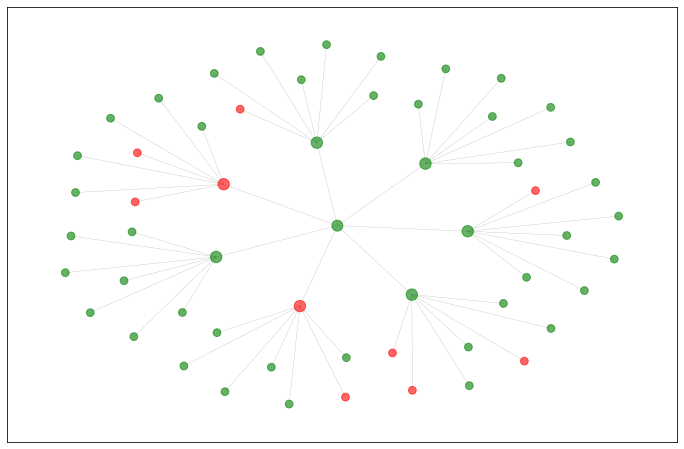

迭代第 1 次 ---- 感染者数量：19 ---- 占比：0.3333333333333333


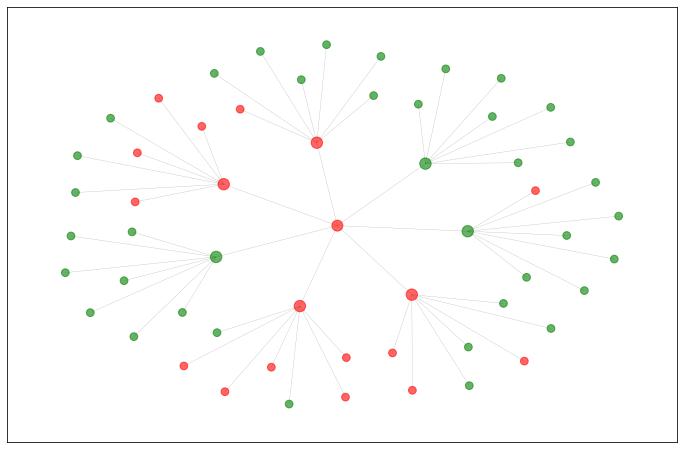

迭代第 2 次 ---- 感染者数量：28 ---- 占比：0.49122807017543857


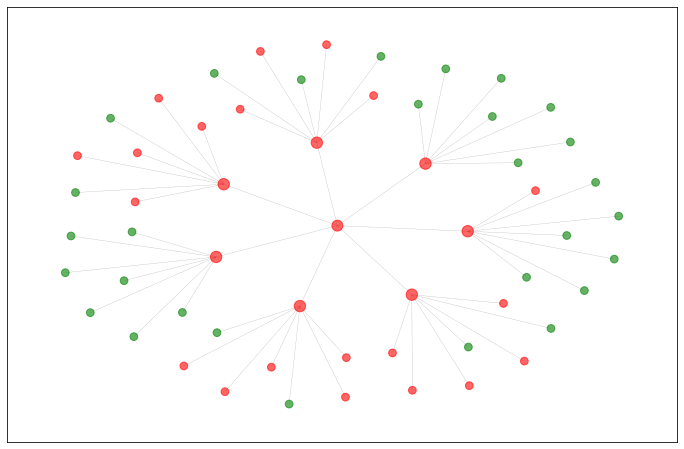

迭代第 3 次 ---- 感染者数量：41 ---- 占比：0.7192982456140351


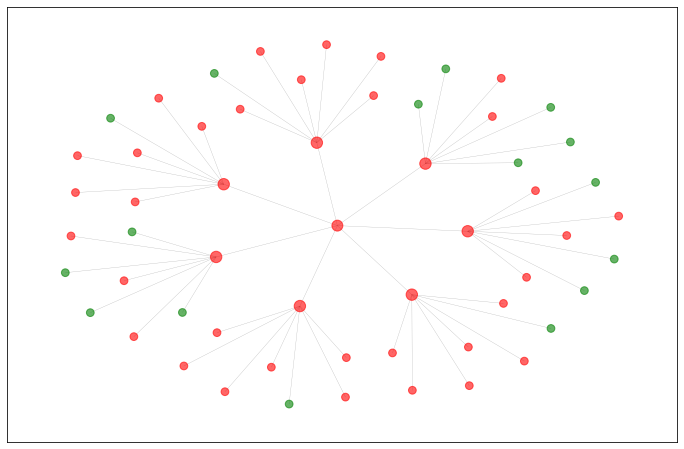

迭代第 4 次 ---- 感染者数量：46 ---- 占比：0.8070175438596491


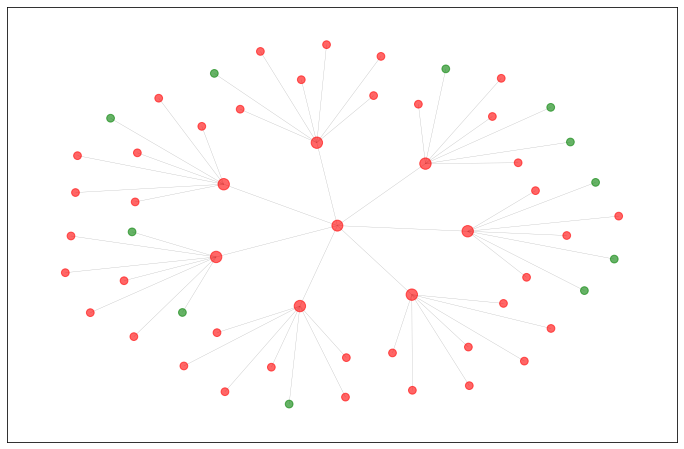

迭代第 5 次 ---- 感染者数量：52 ---- 占比：0.9122807017543859


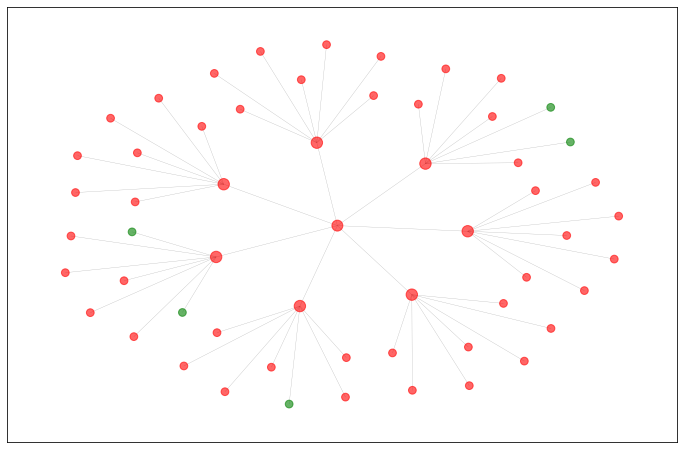

迭代第 6 次 ---- 感染者数量：55 ---- 占比：0.9649122807017544


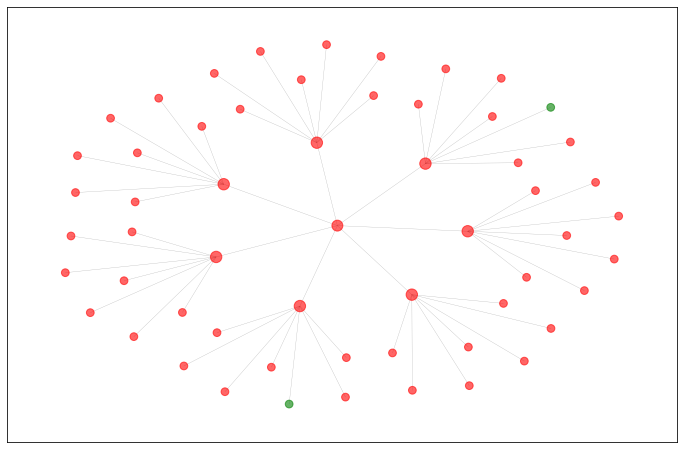

迭代第 7 次 ---- 感染者数量：56 ---- 占比：0.9824561403508771


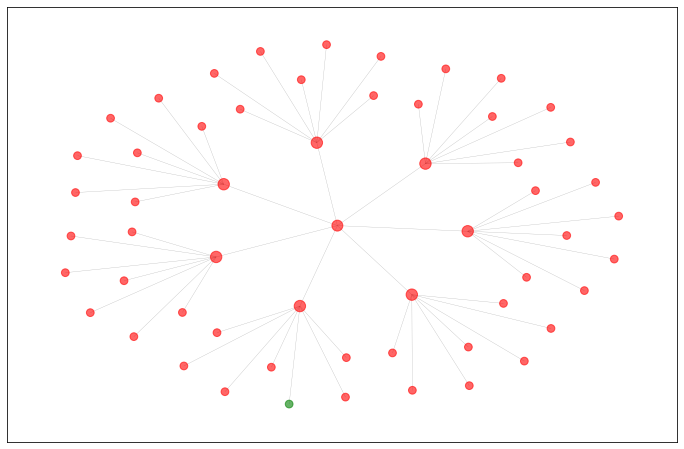

迭代第 8 次 ---- 感染者数量：57 ---- 占比：1.0


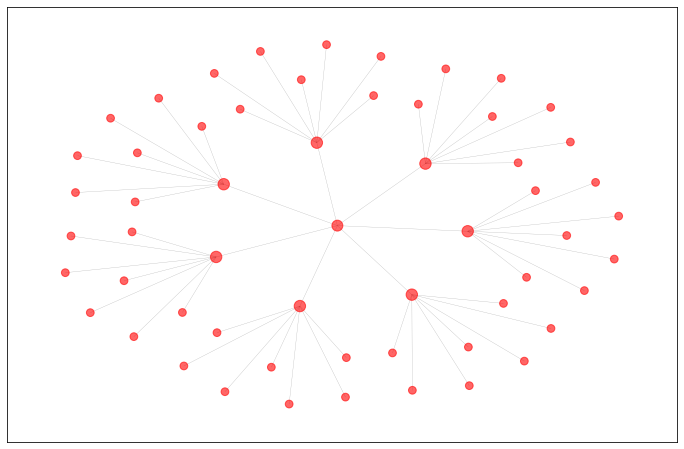

---------- 迭代完成 ----------


<Figure size 432x288 with 0 Axes>

In [9]:
C = tree(7,3)    #生成网络矩阵
show_iteration(C,10,0.5)#传播模拟
plt.savefig('123.png')

In [7]:
def show_iteration(C, max_depth, threshold):
plt.show()

IndentationError: expected an indented block (1916759350.py, line 2)